# UCI: Bandits with Thompson Sampling

In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mclearn.tools import log
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')
sns.set_style('ticks')
%matplotlib inline
%run scripts/thompson.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
uci_sets = ['glass', 'ionosphere', 'iris', 'pima',
            'sonar', 'vehicle', 'wine', 'wpbc']
#astro_sets = ['vstatlas', 'sdss']

The results will be stored in the following DataFrame:

In [5]:
result_idx = ['strategy', 'algorithm', 'reward', 'classifier', 'dataset', 'n_classes', 'split']
result_cols = ['mpba', 'f1', 'accuracy', 'candidates', 'misc']
results = pd.DataFrame(columns = result_idx + result_cols)
results.set_index(result_idx, inplace=True)
results

,,,,,,,mpba,f1,accuracy,candidates,misc
strategy,algorithm,reward,classifier,dataset,n_classes,split,,,,,


Let's try Thompson sampling on the datasets.

In [11]:
for dataset in uci_sets:
    log(dataset, end='')
    data_path = os.path.join('data', dataset + '.csv')
    data = pd.read_csv(data_path)
    X, y = data.iloc[:, 1:], data['target']
    run_thompson_bandit_expt(X, y, results, dataset)

#for dataset in astro_sets:
#    log(dataset, end='')
#    data_path = os.path.join('data', dataset + '.h5')
#    data = pd.read_hdf(data_path, dataset)
#    class_idx = data.columns.get_loc('class')
#    X, y = data.iloc[:, (class_idx+1):], data['class']
#    run_thompson_bandit_expt(X, y, results, dataset, scale=False)

results.to_pickle('pickle/results.pkl')

glass..........3.3 mins
ionosphere..........3.5 mins
iris..........0.7 mins
pima..........5.5 mins
sonar..........1.5 mins
vehicle..........24.9 mins
wine..........1.1 mins
wpbc..........1.4 mins


For comparison, random sampling is used as a benchmark.

In [17]:
for dataset in uci_sets:
    log(dataset, end='')
    data_path = os.path.join('data', dataset + '.csv')
    data = pd.read_csv(data_path)
    X, y = data.iloc[:, 1:], data['target']
    run_thompson_bandit_expt(X, y, results, dataset, kind='random')
pd.concat((pd.read_pickle('pickle/results.pkl'), results)).to_pickle('pickle/results.pkl')

glass..........2.2 mins
ionosphere..........0.3 mins
iris..........0.1 mins
pima..........0.5 mins
sonar..........0.2 mins
vehicle..........12.3 mins
wine..........0.1 mins
wpbc..........0.1 mins


Here are the learning curves comparing random sampling with Thompson sampling on the UCI datasets.

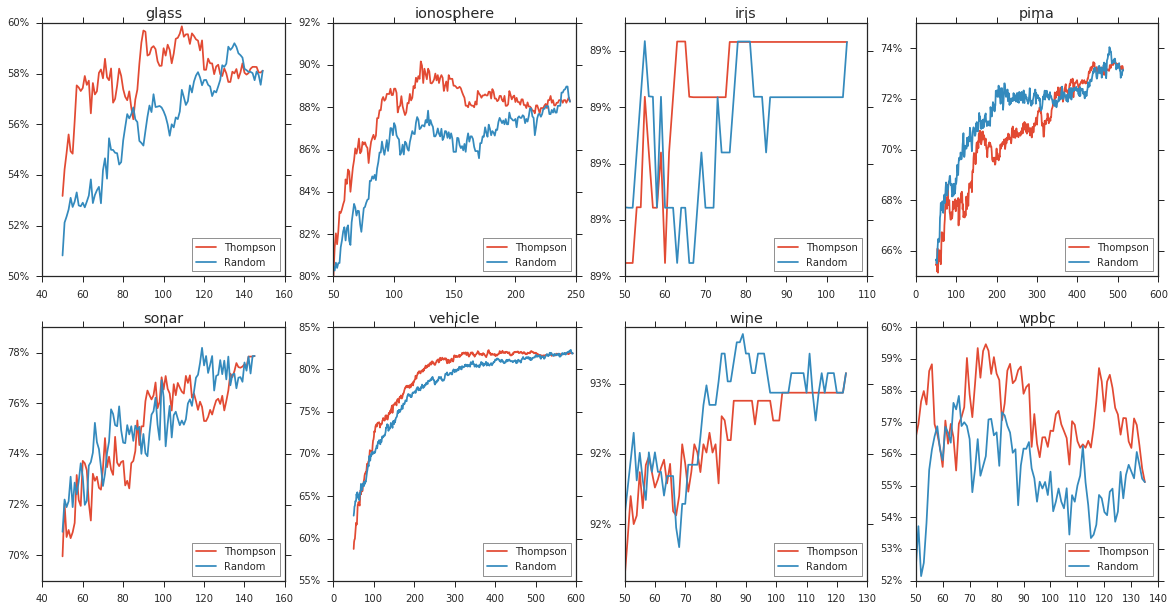

In [65]:
results = pd.read_pickle('pickle/results.pkl')
format_as_percent_plot = lambda x, pos: "{:.0f}%".format(x * 100)
fig = plt.figure(figsize=(20, 10))
for i, dataset in enumerate(uci_sets):
    thompson = results.loc[idx['bandit', 'thompson', 'mpba', 'logistic_ovr', dataset], 'mpba']
    random = results.loc[idx['random', 'random', 'mpba', 'logistic_ovr', dataset], 'mpba']
    
    thompson_lc = np.array(list(thompson)).mean(axis=0)
    random_lc = np.array(list(random)).mean(axis=0)
    
    x_labels = np.arange(50, 50 + len(thompson_lc))
    
    ax = fig.add_subplot(2, 4, i + 1)
    ax.plot(x_labels, thompson_lc, label='Thompson')
    ax.plot(x_labels, random_lc, label='Random')
    ax.legend(loc='lower right', frameon=True)
    ax.get_yaxis().set_major_formatter(FuncFormatter(format_as_percent_plot))
    ax.set_title(dataset)
#fig.savefig(fig_dir + 'uci_thompson_lc.pdf', bbox_inches='tight')
plt.show()